# Climate Analysis with ClimRR


## Climate Scenarios

Climate scenarios are the set of conditions used to represent estimates of
future greenhouse gas (GHG) concentrations in the atmosphere. Climate models
then evaluate how these GHG concentrations affect future (projected) climate.

The data in ClimRR include model results from two future climate scenarios,
called Representative Concentration Pathways (RCPs):

1. **RCP4.5**: in this scenario, human GHG emissions peak around 2040, then
   decline
2. **RCP8.5**: in this scenario, human GHG emissions continue to rise
   throughout the 21-st century

Each RCP is modeled over a **mid-century period** (2045—2054) and
**end-of-century-period** (2081 to 2094). A **historical period** (1995—2004)
is also modeled using GHG concentrations during this period.


In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import warnings

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

import iris
import iris.plot as iplt
import iris.quickplot as qplt

warnings.filterwarnings('ignore')

from pathlib import Path

from ClimRR import DATA_DIR

plt.rcParams.update({
    'axes.facecolor': 'none',
    'figure.facecolor': 'none',
    'savefig.facecolor': 'none',
    'savefig.format': 'svg',
    'axes.edgecolor': 'none',
    'axes.grid': True,
    'axes.labelcolor': '#666',
    'axes.titlecolor': '#666',
    'grid.color': '#666',
    'text.color': '#666',
    'grid.linestyle': '--',
    'grid.linewidth': 0.5,
    'grid.alpha': 0.4,
    'xtick.color': 'none',
    'ytick.color': 'none',
    'xtick.labelcolor': '#666',
    'legend.edgecolor': 'none',
    'ytick.labelcolor': '#666',
    'savefig.transparent': True,
})

In [2]:
shape = gpd.read_file(
    DATA_DIR.joinpath("GridCellsShapefile/GridCells.shp")
)
print(f"shape: {shape}")

shape:        OBJECTID Crossmodel    Shape_Leng    Shape_Area  \
0             1   R161C438  63614.764866  2.529273e+08   
1             2   R125C222  61384.219597  2.355013e+08   
2             3   R121C235  61111.892875  2.334164e+08   
3             4   R169C431  64716.234995  2.617618e+08   
4             5   R146C497  60142.919468  2.260731e+08   
...         ...        ...           ...           ...   
62829     62830   R055C359  54822.101620  1.878414e+08   
62830     62831   R072C387  55964.448729  1.957512e+08   
62831     62832   R085C337  57646.273207  2.076932e+08   
62832     62833   R082C288  57528.265213  2.068438e+08   
62833     62834   R088C416  56916.790562  2.024700e+08   

                                                geometry  
0      POLYGON ((-9530601.177 4726046.614, -9534793.8...  
1      POLYGON ((-12959076.287 4395610.472, -12974301...  
2      POLYGON ((-12754805.395 4355815.951, -12770000...  
3      POLYGON ((-9605729.481 4879238.815, -9609863.1...  
4

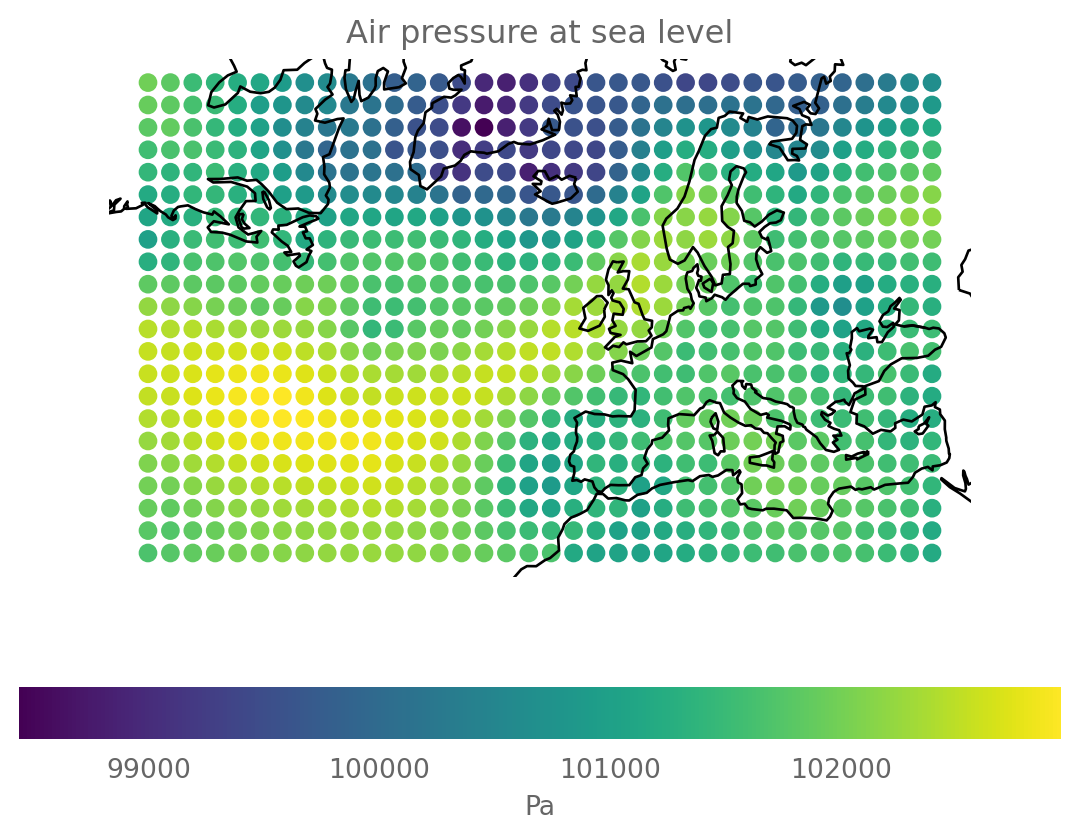

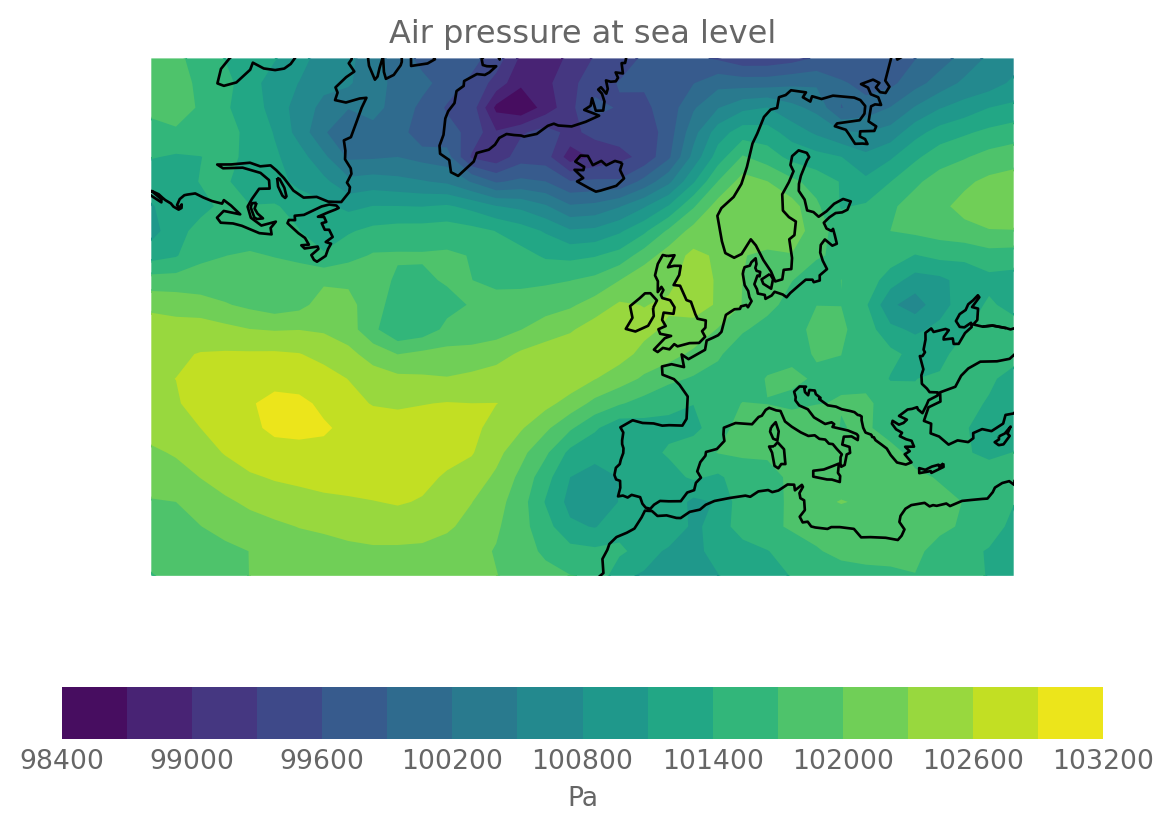

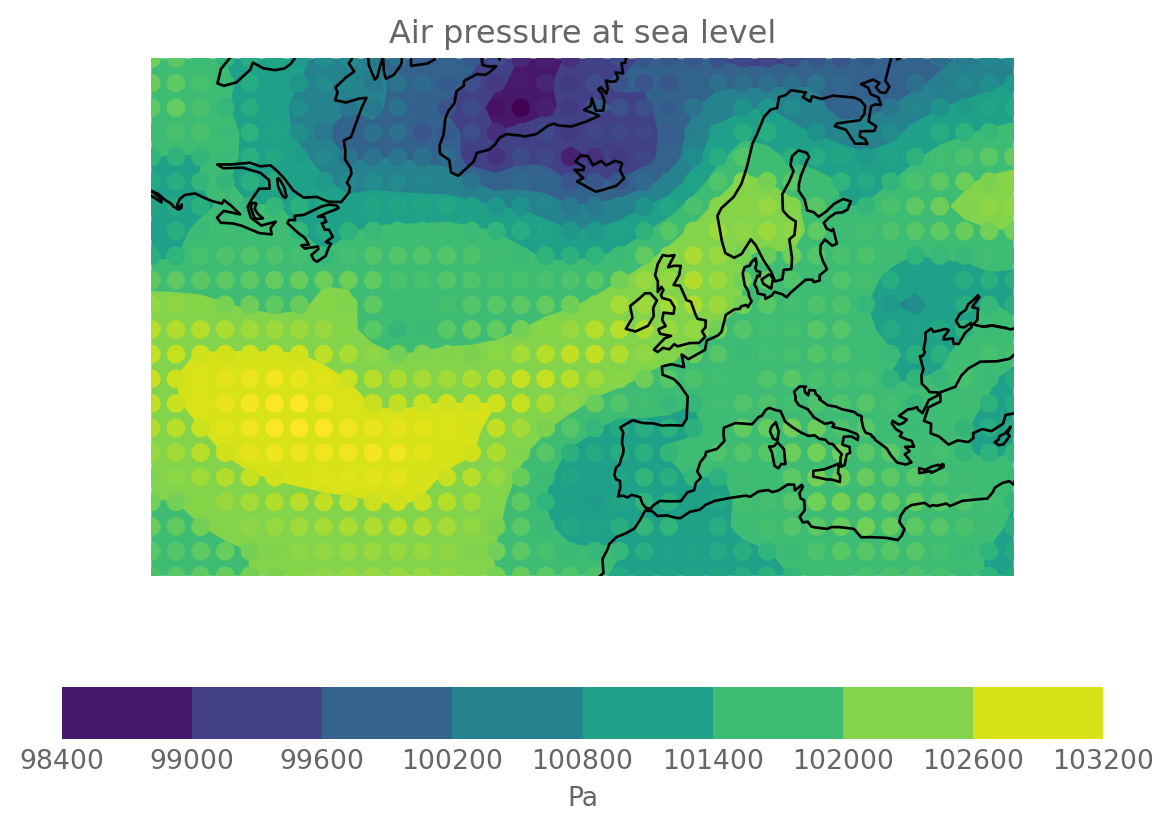

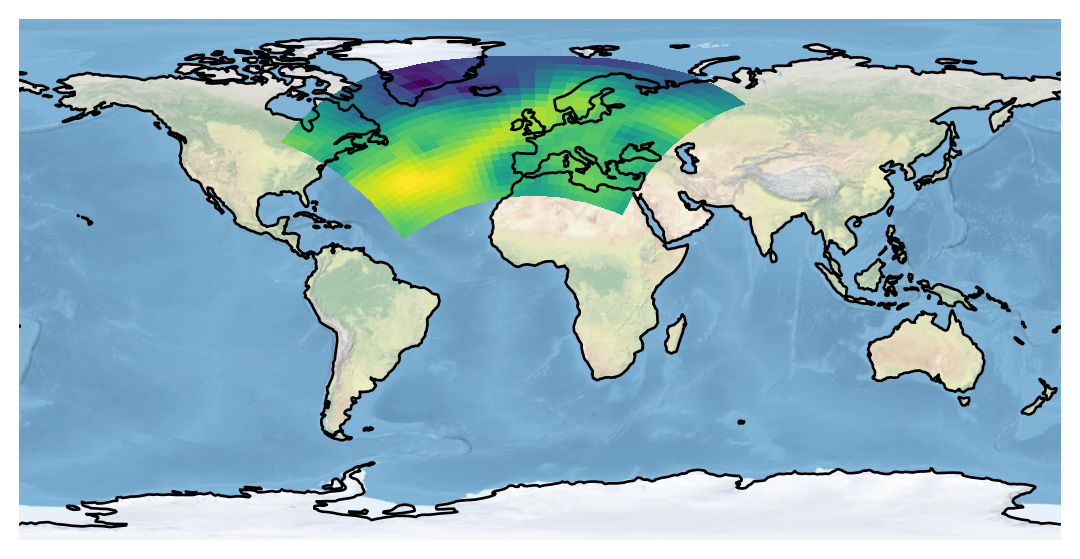

In [3]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

import iris
import iris.analysis.cartography
import iris.plot as iplt
import iris.quickplot as qplt

# Load some test data.
fname = iris.sample_data_path("rotated_pole.nc")
air_pressure = iris.load_cube(fname)

# Plot #1: Point plot showing data values & a colorbar
# plt.figure()
fig, ax = plt.subplots()
points = qplt.points(air_pressure, c=air_pressure.data)
cb = plt.colorbar(points, orientation="horizontal")
cb.set_label(air_pressure.units)
plt.gca().coastlines()

# Plot #2: Contourf of the point based data
plt.figure()
qplt.contourf(air_pressure, 15)
plt.gca().coastlines()
# iplt.show()

# Plot #3: Contourf overlaid by coloured point data
plt.figure()
qplt.contourf(air_pressure)
iplt.points(air_pressure, c=air_pressure.data)
plt.gca().coastlines()

# For the purposes of this example, add some bounds to the latitude
# and longitude
air_pressure.coord("grid_latitude").guess_bounds()
air_pressure.coord("grid_longitude").guess_bounds()

# Plot #4: Block plot
plt.figure()
# fig, ax = plt.subplots()
plt.axes(projection=ccrs.PlateCarree())
iplt.pcolormesh(air_pressure)
plt.gca().stock_img()
plt.gca().coastlines()

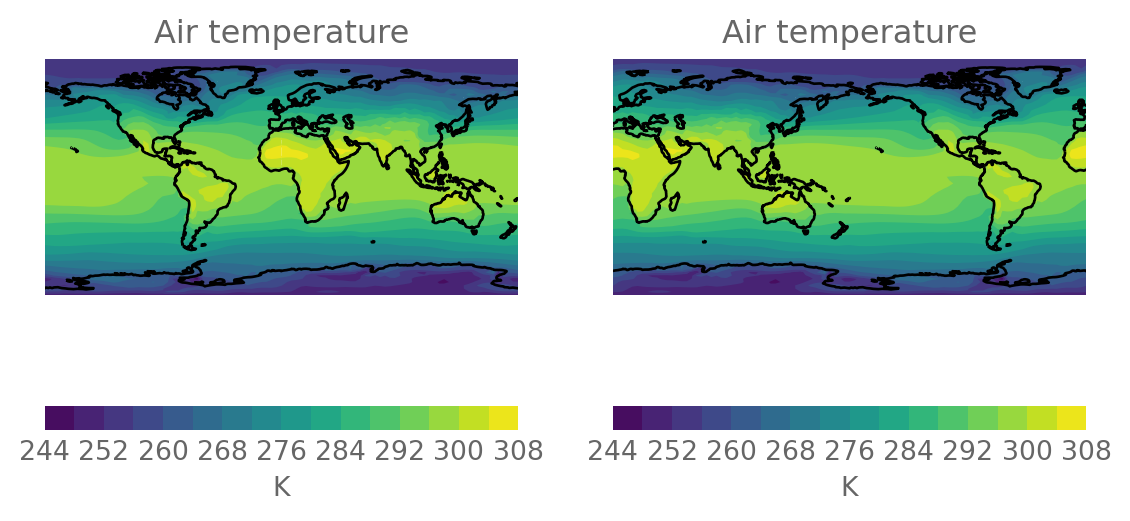

In [4]:
fname = iris.sample_data_path("air_temp.pp")
temperature = iris.load_cube(fname)

fig, ax = plt.subplots()

# Plot #1: contourf with axes longitude from -180 to 180
#plt.figure(figsize=(8, 5))
plt.subplot(121)
qplt.contourf(temperature, 15)
fig.gca().coastlines()

# Plot #2: contourf with axes longitude from 0 to 360
proj = ccrs.PlateCarree(central_longitude=-180.0)
plt.subplot(122, projection=proj)
qplt.contourf(temperature, 15)
fig.gca().coastlines()

(-17.81249542236328, 374.0624038696289, 253.4506408691406, 277.34959106445314)

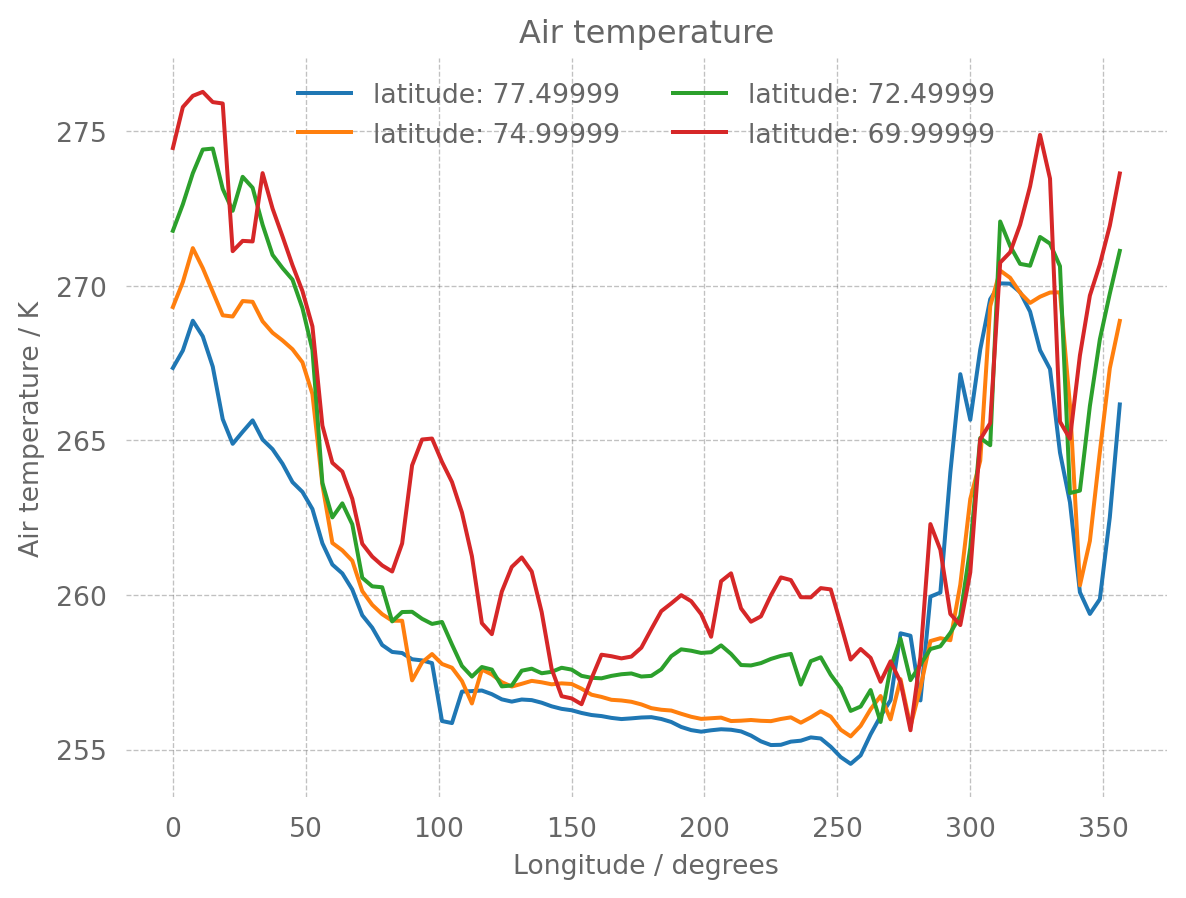

In [5]:
fname = iris.sample_data_path("air_temp.pp")

fig, ax = plt.subplots()
# Load exactly one cube from the given file.
temperature = iris.load_cube(fname)
# We only want a small number of latitudes, so filter some out
# using "extract".
temperature = temperature.extract(
    iris.Constraint(latitude=lambda cell: 68 <= cell < 78)
)

for cube in temperature.slices("longitude"):
    # Create a string label to identify this cube (i.e. latitude: value).
    cube_label = "latitude: %s" % cube.coord("latitude").points[0]

    # Plot the cube, and associate it with a label.
    qplt.plot(cube, label=cube_label)

# Add the legend with 2 columns.
ax.legend(ncol=2)
# Put a grid on the plot.
ax.grid(True)
# Tell matplotlib not to extend the plot axes range to nicely
# rounded numbers.
plt.axis("tight")

## Test Data Showing Inset Plots
This example demonstrates the use of a single 3D data cube with time, latitude
and longitude dimensions to plot a temperature series for a single latitude
coordinate, with an inset plot of the data region.


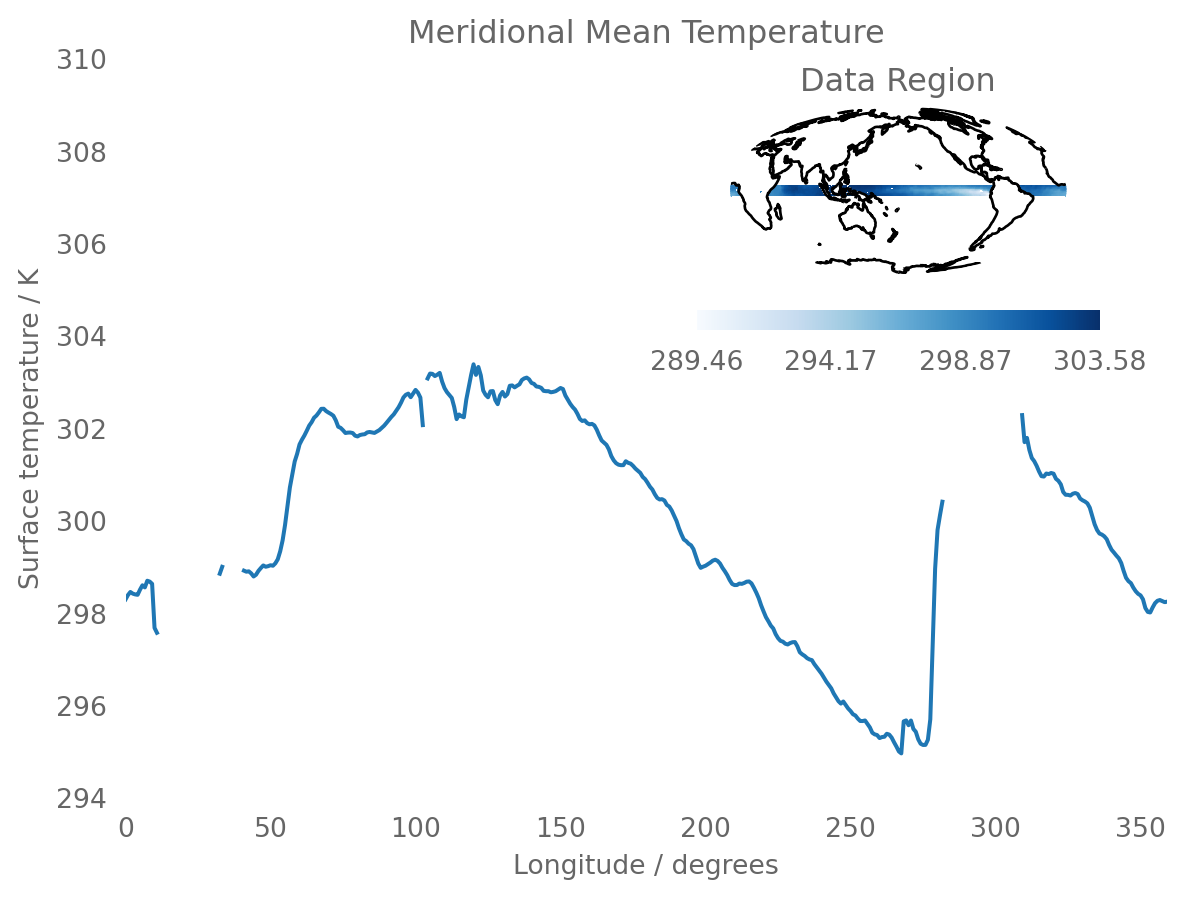

In [6]:
import numpy as np
cube1 = iris.load_cube(iris.sample_data_path("ostia_monthly.nc"))
# Slice into cube to retrieve data for the inset map showing the
# data region
region = cube1[-1, :, :]
# Average over latitude to reduce cube to 1 dimension
plot_line = region.collapsed("latitude", iris.analysis.MEAN)

# Open a window for plotting
fig = plt.figure()
# Add a single subplot (axes). Could also use "ax_main = plt.subplot()"
ax_main = fig.add_subplot(1, 1, 1)
# Produce a quick plot of the 1D cube
qplt.plot(plot_line)

# Set x limits to match the data
ax_main.set_xlim(0, plot_line.coord("longitude").points.max())
# Adjust the y limits so that the inset map won't clash with main plot
ax_main.set_ylim(294, 310)
ax_main.set_title("Meridional Mean Temperature")
# Add grid lines
ax_main.grid()

# Add a second set of axes specifying the fractional coordinates within
# the figure with bottom left corner at x=0.55, y=0.58 with width
# 0.3 and height 0.25.
# Also specify the projection
ax_sub = fig.add_axes(
  [0.55, 0.58, 0.3, 0.25],
  projection=ccrs.Mollweide(central_longitude=180),
)

# Use iris.plot (iplt) here so colour bar properties can be specified
# Also use a sequential colour scheme to reduce confusion for those with
# colour-blindness
iplt.pcolormesh(region, cmap="Blues")
# Manually set the orientation and tick marks on your colour bar
ticklist = np.linspace(np.min(region.data), np.max(region.data), 4)
plt.colorbar(orientation="horizontal", ticks=ticklist)
ax_sub.set_title("Data Region")
# Add coastlines
ax_sub.coastlines()
# request to show entire map, using the colour mesh on the data region only
ax_sub.set_global()

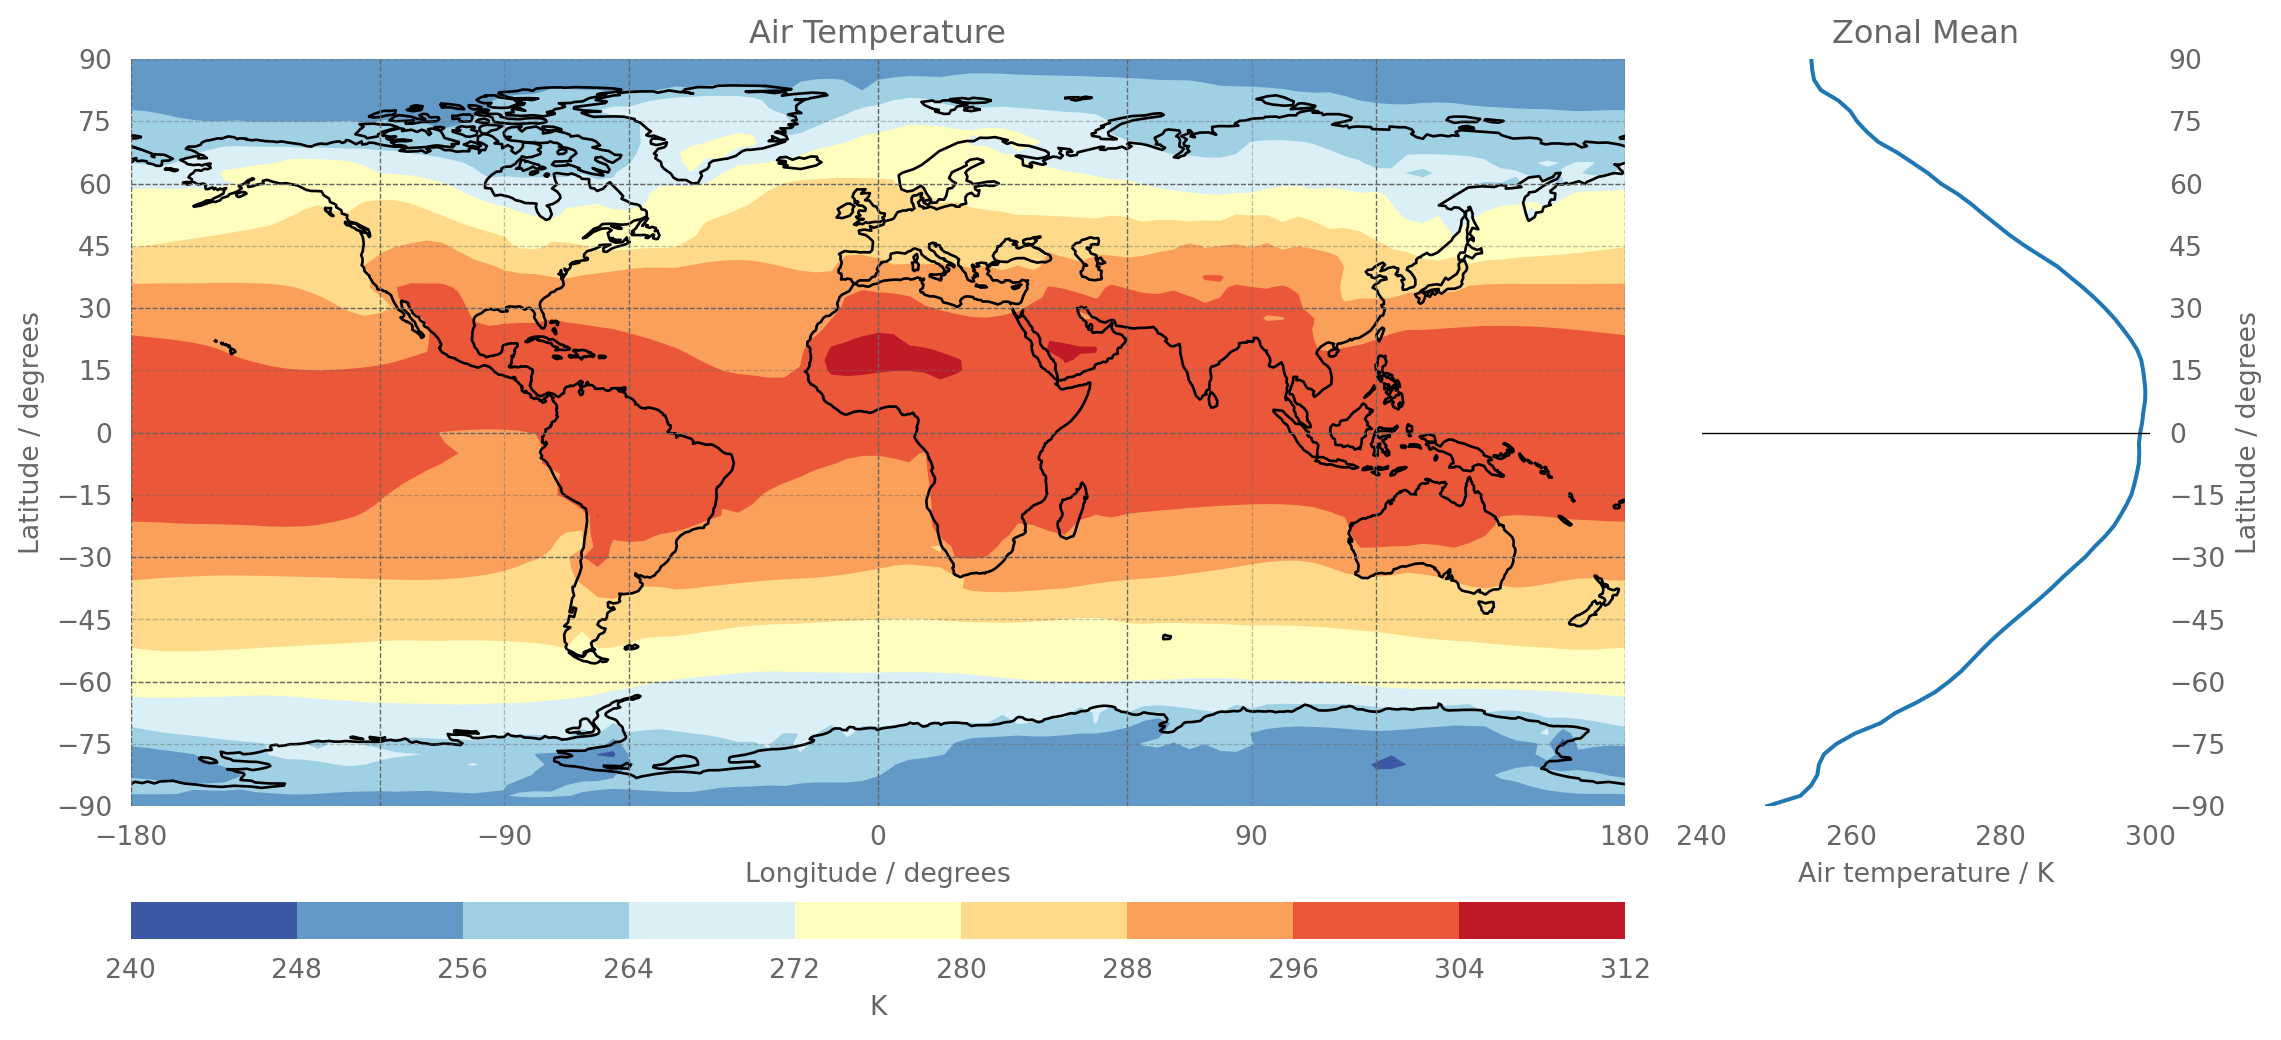

In [7]:
import iris

import numpy as np
import iris.plot as iplt
import iris.quickplot as qplt

from iris.analysis import MEAN

from mpl_toolkits.axes_grid1 import make_axes_locatable

# Loads air_temp.pp and "collapses" longitude into a single, average value.
fname = iris.sample_data_path("air_temp.pp")
temperature = iris.load_cube(fname)
collapsed_temp = temperature.collapsed("longitude", MEAN)


# Set y-axes with -90 and 90 limits and steps of 15 per tick.
start, stop, step = -90, 90, 15
yticks = np.arange(start, stop + step, step)
ylim = [start, stop]

# Plot "temperature" on a cartographic plot and set the ticks and titles
# on the axes.
fig = plt.figure(figsize=[12, 8])
#fig, ax = plt.subplots()

ax1 = fig.add_subplot(111, projection=ccrs.PlateCarree())
im = iplt.contourf(temperature, cmap="RdYlBu_r")
ax1.coastlines()
ax1.gridlines()
ax1.set_xticks([-180, -90, 0, 90, 180])
ax1.set_yticks(yticks)
ax1.set_title("Air Temperature")
ax1.set_ylabel(f"Latitude / {temperature.coord('latitude').units}")
ax1.set_xlabel(f"Longitude / {temperature.coord('longitude').units}")
ax1.set_ylim(*ylim)

# Create a Matplotlib AxesDivider object to allow alignment of other
# Axes objects.
divider = make_axes_locatable(ax1)

# Gives the air temperature bar size, colour and a title.
ax2 = divider.new_vertical(
    size="5%", pad=0.5, axes_class=plt.Axes, pack_start=True
)  # creates 2nd axis
fig.add_axes(ax2)
cbar = plt.colorbar(
    im, cax=ax2, orientation="horizontal"
)  # puts colour bar on second axis
cbar.ax.set_xlabel(f"{temperature.units}")  # labels colour bar

# Plot "collapsed_temp" on the mean graph and set the ticks and titles
# on the axes.
ax3 = divider.new_horizontal(
    size="30%", pad=0.4, axes_class=plt.Axes
)  # create 3rd axis
fig.add_axes(ax3)
qplt.plot(
    collapsed_temp, collapsed_temp.coord("latitude")
)  # plots temperature collapsed over longitude against latitude
ax3.axhline(0, color="k", linewidth=0.5)

# Creates zonal mean details
ax3.set_title("Zonal Mean")
ax3.yaxis.set_label_position("right")
ax3.yaxis.tick_right()
ax3.set_yticks(yticks)
ax3.grid()

# Round each tick for the third ax to the nearest 20 (ready for use).
data_max = collapsed_temp.data.max()
x_max = data_max - data_max % -20
data_min = collapsed_temp.data.min()
x_min = data_min - data_min % 20
ax3.set_xlim(x_min, x_max)
ax3.set_ylim(*ylim)
plt.tight_layout()

(-17.81249542236328, 374.0624038696289, 253.4506408691406, 277.34959106445314)

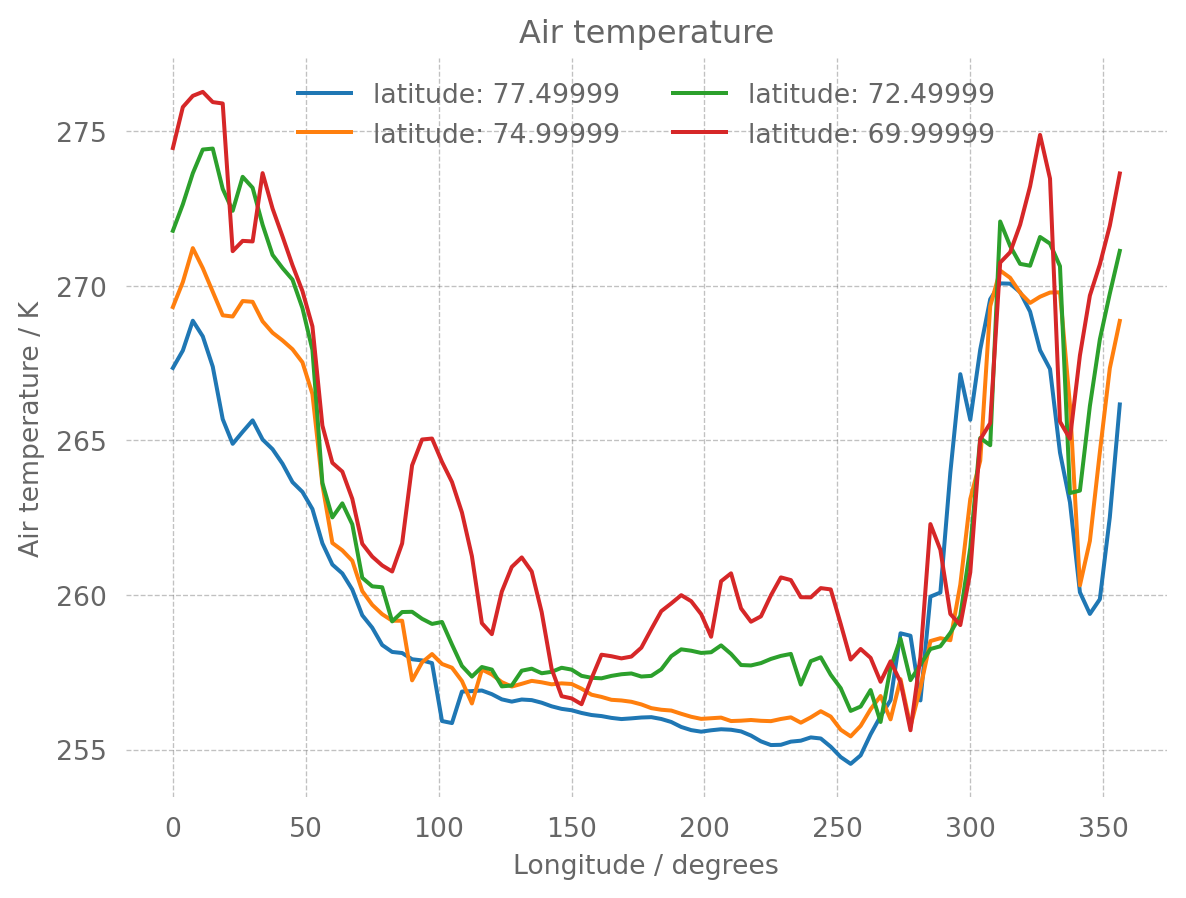

In [8]:
fname = iris.sample_data_path("air_temp.pp")

# Load exactly one cube from the given file.
temperature = iris.load_cube(fname)

# We only want a small number of latitudes, so filter some out
# using "extract".
temperature = temperature.extract(
    iris.Constraint(latitude=lambda cell: 68 <= cell < 78)
)

fig, ax = plt.subplots()

for cube in temperature.slices("longitude"):
    # Create a string label to identify this cube (i.e. latitude: value).
    cube_label = "latitude: %s" % cube.coord("latitude").points[0]

    # Plot the cube, and associate it with a label.
    qplt.plot(cube, label=cube_label)

# Add the legend with 2 columns.
ax.legend(ncol=2)

# Put a grid on the plot.
ax.grid(True)

# Tell matplotlib not to extend the plot axes range to nicely
# rounded numbers.
plt.axis("tight")

Text(0.5, 1.0, 'Temperature anomaly\n1982 differences from 1860-2099 average.')

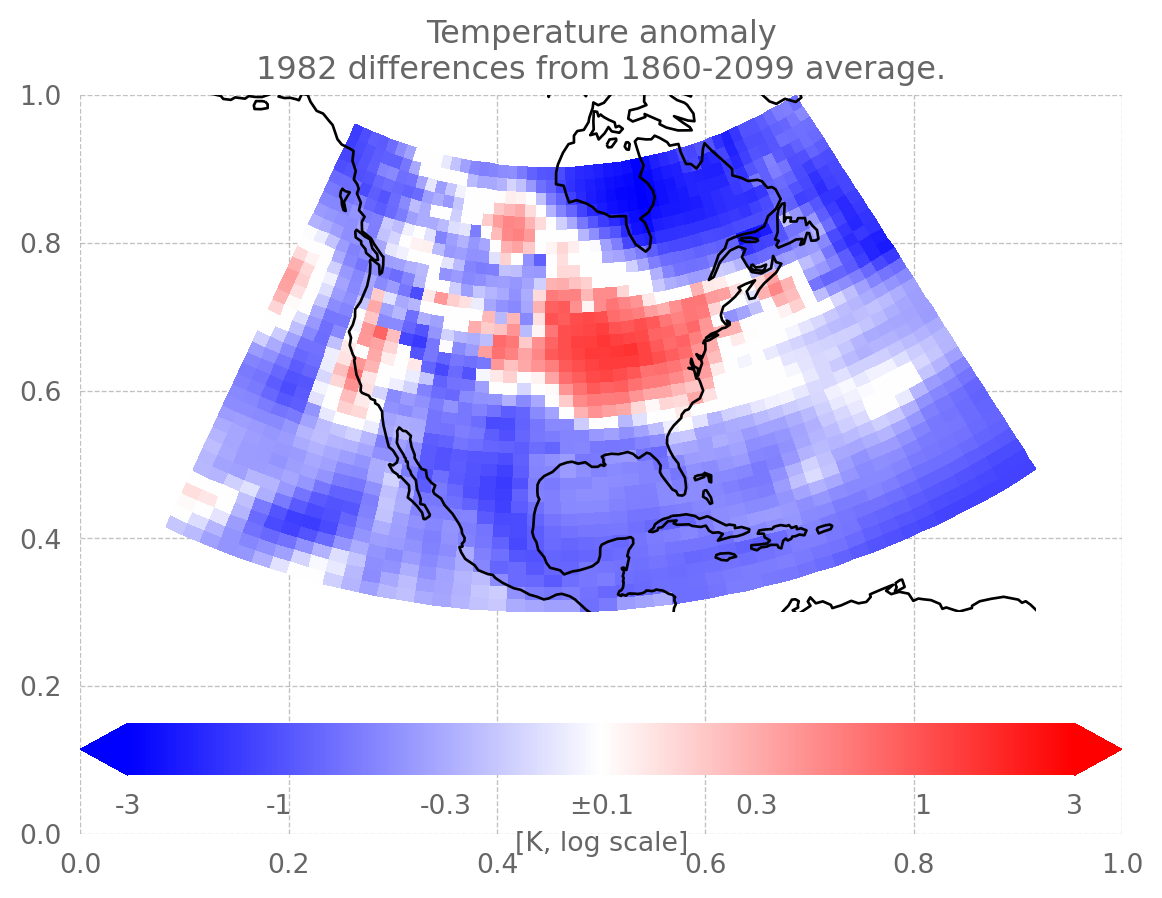

In [9]:
import iris.coord_categorisation
import matplotlib.colors as mcols


fig, ax = plt.subplots()
# Load a sample air temperatures sequence.
file_path = iris.sample_data_path("E1_north_america.nc")
temperatures = iris.load_cube(file_path)

# Create a year-number coordinate from the time information.
iris.coord_categorisation.add_year(temperatures, "time")

# Create a sample anomaly field for one chosen year, by extracting that
# year and subtracting the time mean.
sample_year = 1982
year_temperature = temperatures.extract(iris.Constraint(year=sample_year))
time_mean = temperatures.collapsed("time", iris.analysis.MEAN)
anomaly = year_temperature - time_mean

# Construct a plot title string explaining which years are involved.
years = temperatures.coord("year").points
plot_title = "Temperature anomaly"
plot_title += "\n{} differences from {}-{} average.".format(
    sample_year, years[0], years[-1]
)

# Define scaling levels for the logarithmic colouring.
minimum_log_level = 0.1
maximum_scale_level = 3.0

# Use a standard colour map which varies blue-white-red.
# For suitable options, see the 'Diverging colormaps' section in:
# http://matplotlib.org/stable/gallery/color/colormap_reference.html
anom_cmap = "bwr"

# Create a 'logarithmic' data normalization.
anom_norm = mcols.SymLogNorm(
    linthresh=minimum_log_level,
    linscale=0.01,
    vmin=-maximum_scale_level,
    vmax=maximum_scale_level,
)
# Setting "linthresh=minimum_log_level" makes its non-logarithmic
# data range equal to our 'zero band'.
# Setting "linscale=0.01" maps the whole zero band to the middle colour value
# (i.e., 0.5), which is the neutral point of a "diverging" style colormap.

# Create an Axes, specifying the map projection.
plt.axes(projection=ccrs.LambertConformal())

# Make a pseudocolour plot using this colour scheme.
mesh = iplt.pcolormesh(anomaly, cmap=anom_cmap, norm=anom_norm)

# Add a colourbar, with extensions to show handling of out-of-range values.
bar = plt.colorbar(mesh, orientation="horizontal", extend="both")

# Set some suitable fixed "logarithmic" colourbar tick positions.
tick_levels = [-3, -1, -0.3, 0.0, 0.3, 1, 3]
bar.set_ticks(tick_levels)

# Modify the tick labels so that the centre one shows "+/-<minumum-level>".
tick_levels[3] = r"$\pm${:g}".format(minimum_log_level)
bar.set_ticklabels(tick_levels)

# Label the colourbar to show the units.
bar.set_label("[{}, log scale]".format(anomaly.units))

# Add coastlines and a title.
plt.gca().coastlines()
plt.title(plot_title)